# Datasets Benchmark

**Summary of this Article** 
- Loading best hyperparameters for each model
- Model training
- Results discussion


## Loading best hyperparameters for each model

TODO... explain this model bench mark

In [1]:
# Import hyperparameters dataset.
import os 
import pandas as pd

In [2]:
sparse_hyper_params = {}
focused_hyper_params = {}
balanced_hyper_params = {}
filtered_hyper_params = {}
sparse_class_hyper_params = {}
balanced_class_hyper_params = {}
for file in os.listdir('hyper_params_results'):
    if file.endswith('.csv') and 'regression_sparse' in file:
        df = pd.read_csv(os.path.join('hyper_params_results', file))
        sparse_hyper_params[file] = df
    elif file.endswith('.csv') and 'regression_focused' in file:
        df = pd.read_csv(os.path.join('hyper_params_results', file))
        focused_hyper_params[file] = df
    elif file.endswith('.csv') and 'regression_balanced' in file:
        df = pd.read_csv(os.path.join('hyper_params_results', file))
        balanced_hyper_params[file] = df
    elif file.endswith('.csv') and 'filtered' in file:
        df = pd.read_csv(os.path.join('hyper_params_results', file))
        filtered_hyper_params[file] = df
    elif file.endswith('.csv') and 'sparse_classifier' in file:
        df = pd.read_csv(os.path.join('hyper_params_results', file))
        sparse_class_hyper_params[file] = df
    elif file.endswith('.csv') and 'balanced_classifier' in file:
        df = pd.read_csv(os.path.join('hyper_params_results', file))
        balanced_class_hyper_params[file] = df
print('Sparse hyperparameters: {}/8'.format(len(sparse_hyper_params)))
print('Focused hyperparameters: {}/8'.format(len(focused_hyper_params)))
print('Balanced hyperparameters: {}/8'.format(len(balanced_hyper_params)))
print('Filtered hyperparameters: {}/8'.format(len(filtered_hyper_params)))
print('Sparse classifier hyperparameters: {}/8'.format(len(sparse_class_hyper_params)))
print('Balanced classifier hyperparameters: {}/8'.format(len(balanced_class_hyper_params)))
print('\n')
# print('Sparse hyper params:\n')
# for key in sparse_hyper_params.keys():
#     print(key, ':\n ',sparse_hyper_params[key])
# print('Focused hyper params:\n')
# for key in focused_hyper_params.keys():
#     print(key, ':\n',focused_hyper_params[key])
# print('Boolean hyper params:\n')
# for key in sparse_class_hyper_params.keys():
#     print(key, ':\n',sparse_class_hyper_params[key])

Sparse hyperparameters: 8/8
Focused hyperparameters: 8/8
Balanced hyperparameters: 8/8
Filtered hyperparameters: 8/8
Sparse classifier hyperparameters: 8/8
Balanced classifier hyperparameters: 8/8




In [3]:
import ast
def get_hyper_params_from_df(df):
    output = {}
    for row in df.iterrows():
        if row[1]['params'] != 'value':
            try:
                output[row[1]['params']] = ast.literal_eval(row[1]['value'])
            except :
                output[row[1]['params']] = row[1]['value']
    return output
get_hyper_params_from_df(focused_hyper_params['params_mlp_regression_focused_max_u.csv'])

{'hidden_size': 34,
 'n_layers': 3,
 'dropout': 0.0030412321477918842,
 'activation': 'relu',
 'optimizer': 'sgd',
 'lr': 9.741292351005151e-05,
 'epochs': 55,
 'batch_size': 8,
 'classifier': False}

## Loading the data

In [4]:
import sys
sys.path.append('..');from thesis_package import aimodels as my_ai, utils, metrics
from copy import deepcopy
import sklearn.metrics
from sklearn.model_selection import train_test_split

exogenous_data = pd.read_csv('..\data\processed\production\exogenous_data_extended.csv').drop(columns=['date'])

c:\Users\jamil\Documents\IST\Thesis\new_thesis\code\AI-to-forecast-constraints-in-the-energy-systems\env\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
# Regression data sparse
y_max_u_sparse = pd.read_csv('..\data\ground_truth\\res_bus_vm_pu_max_constr.csv').drop(columns=['timestamps'])
y_min_u_sparse = pd.read_csv('..\data\ground_truth\\res_bus_vm_pu_min_constr.csv').drop(columns=['timestamps'])

train_x, test_x, train_y, test_y, scaler = utils.split_and_suffle(exogenous_data, y_max_u_sparse, test_size=0.2, scaling=True)
data_max_u_sparse = {'X_train': deepcopy(train_x), 'X_test': deepcopy(test_x), 'y_train': deepcopy(train_y), 'y_test': deepcopy(test_y), 'scaler': deepcopy(scaler)}

train_x, test_x, train_y, test_y, scaler = utils.split_and_suffle(exogenous_data, y_min_u_sparse, test_size=0.2, scaling=True)
data_min_u_sparse = {'X_train': deepcopy(train_x), 'X_test': deepcopy(test_x), 'y_train': deepcopy(train_y), 'y_test': deepcopy(test_y), 'scaler': deepcopy(scaler)}

In [6]:
# Classification data sparse
y_max_u_bool = pd.read_csv('..\data\ground_truth\\res_bus_vm_pu_max_bool_constr.csv').drop(columns=['timestamps'])
y_min_u_bool = pd.read_csv('..\data\ground_truth\\res_bus_vm_pu_min_bool_constr.csv').drop(columns=['timestamps'])
y_max_u_bool = y_max_u_bool[utils.cols_with_positive_values(y_max_u_bool)]
y_min_u_bool = y_min_u_bool[utils.cols_with_positive_values(y_min_u_bool)]

train_x, test_x, train_y, test_y, scaler = utils.split_and_suffle(exogenous_data, y_max_u_bool, test_size=0.2, scaling=True)
data_max_u_bool = {'X_train': deepcopy(train_x), 'X_test': deepcopy(test_x), 'y_train': deepcopy(train_y), 'y_test': deepcopy(test_y), 'scaler': deepcopy(scaler)}

train_x, test_x, train_y, test_y, scaler = utils.split_and_suffle(exogenous_data, y_min_u_bool, test_size=0.2, scaling=True)
data_min_u_bool = {'X_train': deepcopy(train_x), 'X_test': deepcopy(test_x), 'y_train': deepcopy(train_y), 'y_test': deepcopy(test_y), 'scaler': deepcopy(scaler)}

In [7]:
# Filtered data
y_max_u_filtered = deepcopy(y_max_u_sparse[utils.cols_with_positive_values(y_max_u_bool)])
y_min_u_filtered = deepcopy(y_min_u_sparse[utils.cols_with_positive_values(y_min_u_bool)])
train_x, test_x, train_y, test_y, scaler = utils.split_and_suffle(exogenous_data, y_max_u_filtered, test_size=0.2, scaling=True)
data_max_u_filtered = {'X_train': deepcopy(train_x), 'X_test': deepcopy(test_x), 'y_train': deepcopy(train_y), 'y_test': deepcopy(test_y), 'scaler': deepcopy(scaler)}

train_x, test_x, train_y, test_y, scaler = utils.split_and_suffle(exogenous_data, y_min_u_filtered, test_size=0.2, scaling=True)
data_min_u_filtered = {'X_train': deepcopy(train_x), 'X_test': deepcopy(test_x), 'y_train': deepcopy(train_y), 'y_test': deepcopy(test_y), 'scaler': deepcopy(scaler)}

In [8]:
# Print the size of the classiciation testing data and the filtered testing data
print('Classification data size: ', data_max_u_bool['y_test'].shape)
print('Regression data size: ', data_max_u_filtered['y_test'].shape)
print('Positive in classification data: ', utils.count_positives_class(data_max_u_bool['y_test']))
#unscaled_y_test = pd.DataFrame(data_max_u_filtered['scaler']['y'].inverse_transform(data_max_u_filtered['y_test']), columns=data_max_u_filtered['y_test'].columns)
unscaled_y_test = utils.unscale_df(data_max_u_filtered['y_test'], data_max_u_filtered['scaler']['y'])
print('Positive in regression data: ', utils.count_positives_reg(unscaled_y_test, utils.compute_threshold(y_max_u_sparse)))
print('Theshhold: ', utils.compute_threshold(y_max_u_sparse))

Classification data size:  (9044, 10)
Regression data size:  (9044, 10)
Positive in classification data:  5036.0
Positive in regression data:  5036
Theshhold:  0.001591058368850724


In [9]:
# Regresison data focused
y_max_u_focused = pd.read_csv('..\data\ground_truth\\res_bus_vm_pu_max_focused_constr.csv')
exogenous_data_focused_max_u = pd.read_csv('..\data\ground_truth\exogenous_data_vm_pu_max_focused.csv').drop(columns=['date'])
y_min_u_focused = pd.read_csv('..\data\ground_truth\\res_bus_vm_pu_min_focused_constr.csv')
exogenous_data_focused_min_u = pd.read_csv('..\data\ground_truth\exogenous_data_vm_pu_min_focused.csv').drop(columns=['date'])

train_x, test_x, train_y, test_y, scaler = utils.split_and_suffle(exogenous_data_focused_max_u, y_max_u_focused, test_size=0.2, scaling=True)
data_max_u_focused = {'X_train': deepcopy(train_x), 'X_test': deepcopy(test_x), 'y_train': deepcopy(train_y), 'y_test': deepcopy(test_y), 'scaler': deepcopy(scaler)}

train_x, test_x, train_y, test_y, scaler = utils.split_and_suffle(exogenous_data_focused_min_u, y_min_u_focused, test_size=0.2, scaling=True)
data_min_u_focused = {'X_train': deepcopy(train_x), 'X_test': deepcopy(test_x), 'y_train': deepcopy(train_y), 'y_test': deepcopy(test_y), 'scaler': deepcopy(scaler)}

In [10]:
# Regresison data balanced
y_max_u_balanced = pd.read_csv('..\data\ground_truth\\res_bus_vm_pu_max_balanced_constr.csv')
exogenous_data_balanced_max_u = pd.read_csv('..\data\ground_truth\exogenous_data_vm_pu_max_balanced.csv').drop(columns=['date'])
y_min_u_balanced = pd.read_csv('..\data\ground_truth\\res_bus_vm_pu_min_balanced_constr.csv')
exogenous_data_balanced_min_u = pd.read_csv('..\data\ground_truth\exogenous_data_vm_pu_min_balanced.csv').drop(columns=['date'])

train_x, test_x, train_y, test_y, scaler = utils.split_and_suffle(exogenous_data_balanced_max_u, y_max_u_balanced, test_size=0.2, scaling=True)
data_max_u_balanced = {'X_train': deepcopy(train_x), 'X_test': deepcopy(test_x), 'y_train': deepcopy(train_y), 'y_test': deepcopy(test_y), 'scaler': deepcopy(scaler)}

train_x, test_x, train_y, test_y, scaler = utils.split_and_suffle(exogenous_data_balanced_min_u, y_min_u_balanced, test_size=0.2, scaling=True)
data_min_u_balanced = {'X_train': deepcopy(train_x), 'X_test': deepcopy(test_x), 'y_train': deepcopy(train_y), 'y_test': deepcopy(test_y), 'scaler': deepcopy(scaler)}

In [11]:
# Classification data balanced
y_max_u_balanced_class = pd.read_csv('..\data\ground_truth\\res_bus_vm_pu_max_balanced_bool_constr.csv')
exogenous_data_balanced_max_u = pd.read_csv('..\data\ground_truth\exogenous_data_vm_pu_max_balanced.csv').drop(columns=['date'])
y_min_u_balanced_class = pd.read_csv('..\data\ground_truth\\res_bus_vm_pu_min_balanced_bool_constr.csv')
exogenous_data_balanced_min_u = pd.read_csv('..\data\ground_truth\exogenous_data_vm_pu_min_balanced.csv').drop(columns=['date'])
y_max_u_balanced_class = y_max_u_balanced_class[utils.cols_with_positive_values(y_max_u_balanced_class)]
y_min_u_balanced_class = y_min_u_balanced_class[utils.cols_with_positive_values(y_min_u_balanced_class)]

train_x, test_x, train_y, test_y, scaler = utils.split_and_suffle(exogenous_data_balanced_max_u, y_max_u_balanced_class, test_size=0.2, scaling=True)
data_max_u_bool_balanced = {'X_train': deepcopy(train_x), 'X_test': deepcopy(test_x), 'y_train': deepcopy(train_y), 'y_test': deepcopy(test_y), 'scaler': deepcopy(scaler)}

train_x, test_x, train_y, test_y, scaler = utils.split_and_suffle(exogenous_data_balanced_min_u, y_min_u_balanced_class, test_size=0.2, scaling=True)
data_min_u_bool_balanced = {'X_train': deepcopy(train_x), 'X_test': deepcopy(test_x), 'y_train': deepcopy(train_y), 'y_test': deepcopy(test_y), 'scaler': deepcopy(scaler)}

Now for a quick sanity check:

In [12]:
utils.check_positive_count(utils.unscale_df(data_max_u_filtered['y_test'], data_max_u_filtered['scaler']['y']), data_max_u_bool['y_test'], utils.compute_threshold(y_max_u_sparse), experiment='max_u')
utils.check_positive_count(utils.unscale_df(data_min_u_filtered['y_test'], data_min_u_filtered['scaler']['y']), data_min_u_bool['y_test'], utils.compute_threshold(y_min_u_sparse), experiment='min_u')
utils.check_negative_count(utils.unscale_df(data_max_u_filtered['y_test'], data_max_u_filtered['scaler']['y']), data_max_u_bool['y_test'], utils.compute_threshold(y_max_u_sparse), experiment='max_u')
utils.check_negative_count(utils.unscale_df(data_min_u_filtered['y_test'], data_min_u_filtered['scaler']['y']), data_min_u_bool['y_test'], utils.compute_threshold(y_min_u_sparse), experiment='min_u')

Positive count in classification data max_u : 5036.0
Positive count in regression data max_u with threshold 0.001591058368850724 : 5036


Positive count in classification data min_u : 6018.0
Positive count in regression data min_u with threshold 0.0020242378560612192 : 6018


Negative count in classification data max_u : 85404.0
Negative count in regression data max_u with threshold 0.001591058368850724 : 85404


Negative count in classification data min_u : 84422.0
Negative count in regression data min_u with threshold 0.0020242378560612192 : 84422




In [13]:
utils.check_positive_count(utils.unscale_df(data_max_u_filtered['y_test'], data_max_u_filtered['scaler']['y']), data_max_u_bool['y_test'], utils.compute_threshold(y_max_u_sparse), experiment='max_u')

Positive count in classification data max_u : 5036.0
Positive count in regression data max_u with threshold 0.001591058368850724 : 5036




## Training models
In this section the models will be trained with the hyperparameters loaded above. All the models will be stored in the same `Context` object for later evaluation. The `Context` object is a class that stores all the models and their respective hyperparameters. The `Context` object is defined in the `aimodels.py` file. The `Context` object is defined as follows:

In [14]:
reg_models = ['lr', 'gb', 'xgb', 'svr', 'mlp']
class_models =  ['gb', 'xgb', 'svr', 'mlp']
max_u_threshold = utils.compute_threshold(y_max_u_sparse)
min_u_threshold = utils.compute_threshold(y_min_u_sparse)

In [15]:
def inverse_transform_filtered(df, scaler):
    for bus in df.columns:
        idx = list(scaler.feature_names_in_).index(bus)
        df[bus] = scaler.max_abs_[idx] * df[bus]
    return df

### Max Voltage

In [16]:
sparse_hyper_params.keys()

dict_keys(['params_gradient_boost_regression_sparse_max_u.csv', 'params_gradient_boost_regression_sparse_min_u.csv', 'params_mlp_regression_sparse_max_u.csv', 'params_mlp_regression_sparse_min_u.csv', 'params_support_vector_regression_sparse_max_u.csv', 'params_support_vector_regression_sparse_min_u.csv', 'params_xgboost_regression_sparse_max_u.csv', 'params_xgboost_regression_sparse_min_u.csv'])

In [17]:
# max_u regression sparse
if 'max_u_regressor_sparse.pickle' not in os.listdir('pickles\dataset_benchmark'):
    print('Training max_u regression sparse')
    # Linear Regression
    regressor_max_u = my_ai.Context(strategy=my_ai.LinearRegressionStrategy())
    regressor_max_u.fit(data=data_max_u_sparse)
    # Gradient Boost Regression
    hyper_params = get_hyper_params_from_df(sparse_hyper_params['params_gradient_boost_regression_sparse_max_u.csv'])
    regressor_max_u.strategy = my_ai.GradientBoostRegressorStrategy(hyper_params)
    regressor_max_u.fit(data=data_max_u_sparse)
    # Extreme GBoost Regression
    hyper_params = get_hyper_params_from_df(sparse_hyper_params['params_xgboost_regression_sparse_max_u.csv']) 
    regressor_max_u.strategy = my_ai.XGBoostRegressorStrategy(hyper_params)
    regressor_max_u.fit(data=data_max_u_sparse)
    # Support Vector Regression
    hyper_params = get_hyper_params_from_df(sparse_hyper_params['params_support_vector_regression_sparse_max_u.csv'])
    regressor_max_u.strategy = my_ai.SupportVectorRegressorStrategy(hyper_params)
    regressor_max_u.fit(data=data_max_u_sparse)
    # MLP Regression
    hyper_params = get_hyper_params_from_df(sparse_hyper_params['params_mlp_regression_sparse_max_u.csv'])
    hyper_params['input_size'] = data_max_u_sparse['X_train'].shape[1]
    hyper_params['output_size'] = data_max_u_sparse['y_train'].shape[1]
    regressor_max_u.strategy = my_ai.MultilayerPerceptronStrategy(hyper_params)
    regressor_max_u.fit(data=data_max_u_sparse)
    utils.serialize_object('pickles\dataset_benchmark\max_u_regressor_sparse', regressor_max_u)
else:
    print('Loading max_u regression sparse') 
    regressor_max_u = utils.deserialize_object('pickles\dataset_benchmark\max_u_regressor_sparse')

testing_data = {'max_u_regressor_sparse': {}}
for model, strategy in zip(reg_models, regressor_max_u.strategies):
    prediction = strategy.predict(data=data_max_u_sparse)
    prediction = pd.DataFrame(prediction, columns=data_max_u_sparse['y_test'].columns)
    testing_data['max_u_regressor_sparse'][model] = {'real': None, 'predicted': None}
    testing_data['max_u_regressor_sparse'][model]['predicted'] = deepcopy(prediction)
    testing_data['max_u_regressor_sparse'][model]['real'] = deepcopy(data_max_u_sparse['y_test'])
    # Unscale
    testing_data['max_u_regressor_sparse'][model]['predicted'] = utils.unscale_df(testing_data['max_u_regressor_sparse'][model]['predicted'],\
                                                                                data_max_u_sparse['scaler']['y'])
    testing_data['max_u_regressor_sparse'][model]['real'] = utils.unscale_df(testing_data['max_u_regressor_sparse'][model]['real'],\
                                                                        data_max_u_sparse['scaler']['y'])
    

Loading max_u regression sparse


In [18]:
# max_u regression focused
if 'max_u_regressor_focused.pickle' not in os.listdir('pickles\dataset_benchmark'):
    print('Training max_u regression focused')
    # Linear Regression
    regressor_max_u_focused = my_ai.Context(strategy=my_ai.LinearRegressionStrategy())
    regressor_max_u_focused.fit(data=data_max_u_focused)
    # Gradient Boost Regression
    hyper_params = get_hyper_params_from_df(focused_hyper_params['params_gradient_boost_regression_focused_max_u.csv'])
    regressor_max_u_focused.strategy = my_ai.GradientBoostRegressorStrategy(hyper_params)
    regressor_max_u_focused.fit(data=data_max_u_focused)
    # Extreme GBoost Regression
    hyper_params = get_hyper_params_from_df(focused_hyper_params['params_xgboost_regression_focused_max_u.csv']) 
    regressor_max_u_focused.strategy = my_ai.XGBoostRegressorStrategy(hyper_params)
    regressor_max_u_focused.fit(data=data_max_u_focused)
    # Support Vector Regression
    hyper_params = get_hyper_params_from_df(focused_hyper_params['params_support_vector_regression_focused_max_u.csv'])
    regressor_max_u_focused.strategy = my_ai.SupportVectorRegressorStrategy(hyper_params)
    regressor_max_u_focused.fit(data=data_max_u_focused)
    # MLP Regression
    hyper_params = get_hyper_params_from_df(focused_hyper_params['params_mlp_regression_focused_max_u.csv'])
    hyper_params['input_size'] = data_max_u_focused['X_train'].shape[1]
    hyper_params['output_size'] = data_max_u_focused['y_train'].shape[1]
    regressor_max_u_focused.strategy = my_ai.MultilayerPerceptronStrategy(hyper_params)
    regressor_max_u_focused.fit(data=data_max_u_focused)
    utils.serialize_object('pickles\dataset_benchmark\max_u_regressor_focused', regressor_max_u_focused)
else: 
    print('Loading max_u regression focused')
    regressor_max_u_focused = utils.deserialize_object('pickles\dataset_benchmark\\max_u_regressor_focused')

testing_data['max_u_regressor_focused'] = {}
for model, strategy in zip(reg_models, regressor_max_u_focused.strategies):
    prediction = strategy.predict(data=data_max_u_sparse)
    prediction = pd.DataFrame(prediction, columns=data_max_u_sparse['y_test'].columns)
    testing_data['max_u_regressor_focused'][model] = {'real': None, 'predicted': None}
    testing_data['max_u_regressor_focused'][model]['predicted'] = deepcopy(prediction)
    testing_data['max_u_regressor_focused'][model]['real'] = deepcopy(data_max_u_sparse['y_test'])
    # Unsacale
    testing_data['max_u_regressor_focused'][model]['predicted'] = utils.unscale_df(testing_data['max_u_regressor_focused'][model]['predicted'],\
                                                                                data_max_u_sparse['scaler']['y'])
    testing_data['max_u_regressor_focused'][model]['real'] = utils.unscale_df(testing_data['max_u_regressor_focused'][model]['real'],\
                                                                        data_max_u_sparse['scaler']['y'])
    

Loading max_u regression focused


In [19]:
# max_u regression filtered
if 'max_u_filtered_regressor.pickle' not in os.listdir('pickles\dataset_benchmark'):
    print('Training max_u regression filtered')
    # Linear Regression
    regressor_max_u_filtered = my_ai.Context(strategy=my_ai.LinearRegressionStrategy())
    regressor_max_u_filtered.fit(data=data_max_u_filtered)
    # Gradient Boost Regression
    hyper_params = get_hyper_params_from_df(filtered_hyper_params['params_gradient_boost_regression_filtered_max_u.csv'])
    regressor_max_u_filtered.strategy = my_ai.GradientBoostRegressorStrategy(hyper_params)
    regressor_max_u_filtered.fit(data=data_max_u_filtered)
    # Extreme GBoost Classifier
    hyper_params = get_hyper_params_from_df(filtered_hyper_params['params_xgboost_regression_filtered_max_u.csv'])
    regressor_max_u_filtered.strategy = my_ai.XGBoostRegressorStrategy(hyper_params)
    regressor_max_u_filtered.fit(data=data_max_u_filtered)
    # Support Vector Classifier
    hyper_params = get_hyper_params_from_df(filtered_hyper_params['params_support_vector_regression_filtered_max_u.csv'])
    regressor_max_u_filtered.strategy = my_ai.SupportVectorRegressorStrategy(hyper_params)
    regressor_max_u_filtered.fit(data=data_max_u_filtered)
    # MLP Classifier
    hyper_params = get_hyper_params_from_df(filtered_hyper_params['params_mlp_regression_filtered_max_u.csv'])
    hyper_params['input_size'] = data_max_u_filtered['X_train'].shape[1]
    hyper_params['output_size'] = data_max_u_filtered['y_train'].shape[1]
    regressor_max_u_filtered.strategy = my_ai.MultilayerPerceptronStrategy(hyper_params)
    regressor_max_u_filtered.fit(data=data_max_u_filtered)
    utils.serialize_object('pickles\dataset_benchmark\max_u_filtered_regressor', regressor_max_u_filtered)
else: 
    print('Loading max_u filtered regression')
    regressor_max_u_filtered = utils.deserialize_object('pickles\dataset_benchmark\max_u_filtered_regressor')

testing_data['max_u_filtered_regressor'] = {}
for model, strategy in zip(reg_models, regressor_max_u_filtered.strategies):
    prediction = strategy.predict(data=data_max_u_sparse)
    prediction = pd.DataFrame(prediction, columns=data_max_u_filtered['y_test'].columns)
    testing_data['max_u_filtered_regressor'][model] = {'real': None, 'predicted': None}
    testing_data['max_u_filtered_regressor'][model]['predicted'] = deepcopy(prediction)
    testing_data['max_u_filtered_regressor'][model]['real'] = deepcopy(data_max_u_sparse['y_test'])
    # Unsacale
    testing_data['max_u_filtered_regressor'][model]['predicted'] = inverse_transform_filtered(testing_data['max_u_filtered_regressor'][model]['predicted'],\
                                                                                data_max_u_sparse['scaler']['y'])
    testing_data['max_u_filtered_regressor'][model]['real'] = inverse_transform_filtered(testing_data['max_u_filtered_regressor'][model]['real'][utils.cols_with_positive_values(prediction)],\
                                                                        data_max_u_sparse['scaler']['y'])
    # Filter real data
    #testing_data['max_u_filtered_regressor'][model]['real'] = deepcopy(data_max_u_sparse['y_test'][utils.cols_with_positive_values(prediction)])
# print(utils.count_positives_reg(testing_data['max_u_filtered_regressor']['mlp']['real'], max_u_threshold))

Loading max_u filtered regression


C:\Users\jamil\AppData\Local\Temp\ipykernel_19944\1155023926.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[bus] = scaler.max_abs_[idx] * df[bus]
C:\Users\jamil\AppData\Local\Temp\ipykernel_19944\1155023926.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[bus] = scaler.max_abs_[idx] * df[bus]
C:\Users\jamil\AppData\Local\Temp\ipykernel_19944\1155023926.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

In [20]:
# max u regression balanced
if 'max_u_regressor_balanced.pickle' not in os.listdir('pickles\dataset_benchmark'):
    print('Training max_u regression balanced')
    # Linear Regression
    regressor_max_u_balanced = my_ai.Context(strategy=my_ai.LinearRegressionStrategy())
    regressor_max_u_balanced.fit(data=data_max_u_balanced)
    # Gradient Boost Regression
    hyper_params = get_hyper_params_from_df(balanced_hyper_params['params_gradient_boost_regression_balanced_max_u.csv'])
    regressor_max_u_balanced.strategy = my_ai.GradientBoostRegressorStrategy(hyper_params)
    regressor_max_u_balanced.fit(data=data_max_u_balanced)
    # Extreme GBoost Regression
    hyper_params = get_hyper_params_from_df(balanced_hyper_params['params_xgboost_regression_balanced_max_u.csv'])
    regressor_max_u_balanced.strategy = my_ai.XGBoostRegressorStrategy(hyper_params)
    regressor_max_u_balanced.fit(data=data_max_u_balanced)
    # Support Vector Regression
    hyper_params = get_hyper_params_from_df(balanced_hyper_params['params_support_vector_regression_balanced_max_u.csv'])
    regressor_max_u_balanced.strategy = my_ai.SupportVectorRegressorStrategy(hyper_params)
    regressor_max_u_balanced.fit(data=data_max_u_balanced)
    # MLP Regression
    hyper_params = get_hyper_params_from_df(balanced_hyper_params['params_mlp_regression_balanced_max_u.csv'])
    hyper_params['input_size'] = data_max_u_balanced['X_train'].shape[1]
    hyper_params['output_size'] = data_max_u_balanced['y_train'].shape[1]
    regressor_max_u_balanced.strategy = my_ai.MultilayerPerceptronStrategy(hyper_params)
    regressor_max_u_balanced.fit(data=data_max_u_balanced)
    utils.serialize_object('pickles\dataset_benchmark\max_u_regressor_balanced', regressor_max_u_balanced)
else: 
    print('Loading max_u regression balanced')
    regressor_max_u_balanced = utils.deserialize_object('pickles\dataset_benchmark\max_u_regressor_balanced')

testing_data['max_u_regressor_balanced'] = {}
for model, strategy in zip(reg_models, regressor_max_u_balanced.strategies):
    prediction = strategy.predict(data=data_max_u_sparse)
    prediction = pd.DataFrame(prediction, columns=data_max_u_balanced['y_test'].columns)
    testing_data['max_u_regressor_balanced'][model] = {'real': None, 'predicted': None}
    testing_data['max_u_regressor_balanced'][model]['predicted'] = deepcopy(prediction)
    testing_data['max_u_regressor_balanced'][model]['real'] = deepcopy(data_max_u_sparse['y_test'])
    # Unsacale
    testing_data['max_u_regressor_balanced'][model]['predicted'] = utils.unscale_df(testing_data['max_u_regressor_balanced'][model]['predicted'],\
                                                                                data_max_u_balanced['scaler']['y'])
    testing_data['max_u_regressor_balanced'][model]['real'] = utils.unscale_df(testing_data['max_u_regressor_balanced'][model]['real'],\
                                                                        data_max_u_sparse['scaler']['y'])

Loading max_u regression balanced


In [21]:
# max_u classification
if 'max_u_classifier.pickle' not in os.listdir('pickles\dataset_benchmark'):
    print('Training max_u classification')
    # Gradient Boost Classifier
    hyper_params = get_hyper_params_from_df(sparse_class_hyper_params['params_gradient_boost_sparse_classifier_max_u.csv'])
    classifier_max_u = my_ai.Context(strategy=my_ai.GradientBoostClassifierStrategy(hyper_params))
    classifier_max_u.fit(data=data_max_u_bool)
    # Extreme GBoost Classifier
    hyper_params = get_hyper_params_from_df(sparse_class_hyper_params['params_xgboost_sparse_classifier_max_u.csv'])
    classifier_max_u.strategy = my_ai.XGBoostClassifierStrategy(hyper_params)
    classifier_max_u.fit(data=data_max_u_bool)
    # Support Vector Classifier
    hyper_params = get_hyper_params_from_df(sparse_class_hyper_params['params_support_vector_sparse_classifier_max_u.csv'])
    classifier_max_u.strategy = my_ai.SupportVectorClassifierStrategy(hyper_params)
    classifier_max_u.fit(data=data_max_u_bool)
    # MLP Classifier
    hyper_params = get_hyper_params_from_df(sparse_class_hyper_params['params_mlp_sparse_classifier_max_u.csv'])
    hyper_params['input_size'] = data_max_u_bool['X_train'].shape[1]
    hyper_params['output_size'] = data_max_u_bool['y_train'].shape[1]
    classifier_max_u.strategy = my_ai.MultilayerPerceptronStrategy(hyper_params)
    classifier_max_u.fit(data=data_max_u_bool)
    utils.serialize_object('pickles\dataset_benchmark\max_u_classifier', classifier_max_u)
else: 
    print('Loading max_u classification')
    classifier_max_u = utils.deserialize_object('pickles\dataset_benchmark\max_u_classifier')

testing_data['max_u_classifier'] = {}
for model, strategy in zip(class_models, classifier_max_u.strategies):
    prediction = strategy.predict(data=data_max_u_bool)
    prediction = pd.DataFrame(prediction, columns=data_max_u_bool['y_test'].columns)
    testing_data['max_u_classifier'][model] = {'real': None, 'predicted': None}
    testing_data['max_u_classifier'][model]['predicted'] = deepcopy(prediction)
    testing_data['max_u_classifier'][model]['real'] = deepcopy(data_max_u_bool['y_test'])

Loading max_u classification


<AxesSubplot:>

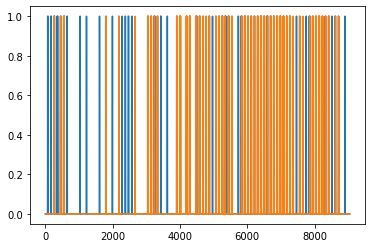

In [22]:
testing_data['max_u_classifier']['xgb']['predicted']['bus_15'].plot()
testing_data['max_u_classifier']['xgb']['real']['bus_15'].plot()

In [23]:
# max_u classification balanced
if 'max_u_classifier_balanced.pickle' not in os.listdir('pickles\dataset_benchmark'):
    print('Training max_u classification balanced')
    # Gradient Boost Classifier
    hyper_params = get_hyper_params_from_df(balanced_class_hyper_params['params_gradient_boost_balanced_classifier_max_u.csv'])
    classifier_max_u_balanced = my_ai.Context(strategy=my_ai.GradientBoostClassifierStrategy(hyper_params))
    classifier_max_u_balanced.fit(data=data_max_u_bool_balanced)
    # Extreme GBoost Classifier
    hyper_params = get_hyper_params_from_df(balanced_class_hyper_params['params_xgboost_balanced_classifier_max_u.csv'])
    classifier_max_u_balanced.strategy = my_ai.XGBoostClassifierStrategy(hyper_params)
    classifier_max_u_balanced.fit(data=data_max_u_bool_balanced)
    # Support Vector Classifier
    hyper_params = get_hyper_params_from_df(balanced_class_hyper_params['params_support_vector_balanced_classifier_max_u.csv'])
    classifier_max_u_balanced.strategy = my_ai.SupportVectorClassifierStrategy(hyper_params)
    classifier_max_u_balanced.fit(data=data_max_u_bool_balanced)
    # MLP Classifier
    hyper_params = get_hyper_params_from_df(balanced_class_hyper_params['params_mlp_balanced_classifier_max_u.csv'])
    hyper_params['input_size'] = data_max_u_bool_balanced['X_train'].shape[1]
    hyper_params['output_size'] = data_max_u_bool_balanced['y_train'].shape[1]
    classifier_max_u_balanced.strategy = my_ai.MultilayerPerceptronStrategy(hyper_params)
    classifier_max_u_balanced.fit(data=data_max_u_bool_balanced)
    utils.serialize_object('pickles\dataset_benchmark\max_u_classifier_balanced', classifier_max_u_balanced)
else: 
    print('Loading max_u classification balanced')
    classifier_max_u_balanced = utils.deserialize_object('pickles\dataset_benchmark\max_u_classifier_balanced')

testing_data['max_u_classifier_balanced'] = {}
for model, strategy in zip(class_models, classifier_max_u_balanced.strategies):
    prediction = strategy.predict(data=data_max_u_bool)
    prediction = pd.DataFrame(prediction, columns=data_max_u_bool_balanced['y_test'].columns)
    testing_data['max_u_classifier_balanced'][model] = {'real': None, 'predicted': None}
    testing_data['max_u_classifier_balanced'][model]['predicted'] = deepcopy(prediction)
    testing_data['max_u_classifier_balanced'][model]['real'] = deepcopy(data_max_u_bool['y_test'])

Loading max_u classification balanced


In [24]:
classifier_max_u_balanced.strategies

### Min u regression training


In [25]:
# min_u regression sparse
if 'min_u_regressor_sparse.pickle' not in os.listdir('pickles\dataset_benchmark'):
    print('Training min_u regression sparse')
    # Linear Regression
    regressor_min_u = my_ai.Context(strategy=my_ai.LinearRegressionStrategy())
    regressor_min_u.fit(data=data_min_u_sparse)
    # Gradient Boost Regression
    hyper_params = get_hyper_params_from_df(sparse_hyper_params['params_gradient_boost_regression_sparse_min_u.csv'])
    regressor_min_u.strategy = my_ai.GradientBoostRegressorStrategy(hyper_params)
    regressor_min_u.fit(data=data_min_u_sparse)
    # Extreme GBoost Regression
    hyper_params = get_hyper_params_from_df(sparse_hyper_params['params_xgboost_regression_sparse_min_u.csv'])
    regressor_min_u.strategy = my_ai.XGBoostRegressorStrategy(hyper_params)
    regressor_min_u.fit(data=data_min_u_sparse)
    # Support Vector Regression
    hyper_params = get_hyper_params_from_df(sparse_hyper_params['params_support_vector_regression_sparse_min_u.csv'])
    regressor_min_u.strategy = my_ai.SupportVectorRegressorStrategy(hyper_params)
    regressor_min_u.fit(data=data_min_u_sparse)
    # MLP Regression
    hyper_params = get_hyper_params_from_df(sparse_hyper_params['params_mlp_regression_sparse_min_u.csv'])
    hyper_params['input_size'] = data_min_u_sparse['X_train'].shape[1]
    hyper_params['output_size'] = data_min_u_sparse['y_train'].shape[1]
    regressor_min_u.strategy = my_ai.MultilayerPerceptronStrategy(hyper_params)
    regressor_min_u.fit(data=data_min_u_sparse)
    utils.serialize_object('pickles\dataset_benchmark\min_u_regressor_sparse', regressor_min_u)
else:
    print('Loading min_u regression sparse')
    regressor_min_u = utils.deserialize_object('pickles\dataset_benchmark\min_u_regressor_sparse')

testing_data['min_u_regressor_sparse'] = {}
for model, strategy in zip(reg_models, regressor_min_u.strategies):
    prediction = strategy.predict(data=data_min_u_sparse)
    prediction = pd.DataFrame(prediction, columns=data_min_u_sparse['y_test'].columns)
    testing_data['min_u_regressor_sparse'][model] = {'real': None, 'predicted': None}
    testing_data['min_u_regressor_sparse'][model]['predicted'] = deepcopy(prediction)
    testing_data['min_u_regressor_sparse'][model]['real'] = deepcopy(data_min_u_sparse['y_test'])
    # Unsacale
    testing_data['min_u_regressor_sparse'][model]['predicted'] = utils.unscale_df(testing_data['min_u_regressor_sparse'][model]['predicted'],\
                                                                                data_min_u_sparse['scaler']['y'])
    testing_data['min_u_regressor_sparse'][model]['real'] = utils.unscale_df(testing_data['min_u_regressor_sparse'][model]['real'],\
                                                                        data_min_u_sparse['scaler']['y'])

Loading min_u regression sparse


In [26]:
# min_u regression focused
if 'min_u_regressor_focused.pickle' not in os.listdir('pickles\dataset_benchmark'):
    print('Training min_u regression focused')
    # Linear Regression
    regressor_min_u_focused = my_ai.Context(strategy=my_ai.LinearRegressionStrategy())
    regressor_min_u_focused.fit(data=data_min_u_focused)
    # Gradient Boost Regression
    hyper_params = get_hyper_params_from_df(focused_hyper_params['params_gradient_boost_regression_focused_min_u.csv'])
    regressor_min_u_focused.strategy = my_ai.GradientBoostRegressorStrategy(hyper_params)
    regressor_min_u_focused.fit(data=data_min_u_focused)
    # Extreme GBoost Regression
    hyper_params = get_hyper_params_from_df(focused_hyper_params['params_xgboost_regression_focused_min_u.csv'])
    regressor_min_u_focused.strategy = my_ai.XGBoostRegressorStrategy(hyper_params)
    regressor_min_u_focused.fit(data=data_min_u_focused)
    # Support Vector Regression
    hyper_params = get_hyper_params_from_df(focused_hyper_params['params_support_vector_regression_focused_min_u.csv'])
    regressor_min_u_focused.strategy = my_ai.SupportVectorRegressorStrategy(hyper_params)
    regressor_min_u_focused.fit(data=data_min_u_focused)
    # MLP Regression
    hyper_params = get_hyper_params_from_df(focused_hyper_params['params_mlp_regression_focused_min_u.csv'])
    hyper_params['input_size'] = data_min_u_focused['X_train'].shape[1]
    hyper_params['output_size'] = data_min_u_focused['y_train'].shape[1]
    regressor_min_u_focused.strategy = my_ai.MultilayerPerceptronStrategy(hyper_params)
    regressor_min_u_focused.fit(data=data_min_u_focused)
    utils.serialize_object('pickles\dataset_benchmark\min_u_regressor_focused', regressor_min_u_focused)
else:
    print('Loading min_u regression focused')
    regressor_min_u_focused = utils.deserialize_object('pickles\dataset_benchmark\min_u_regressor_focused')

testing_data['min_u_regressor_focused'] = {}
for model, strategy in zip(reg_models, regressor_min_u_focused.strategies):
    prediction = strategy.predict(data=data_min_u_sparse)
    prediction = pd.DataFrame(prediction, columns=data_min_u_focused['y_test'].columns)
    testing_data['min_u_regressor_focused'][model] = {'real': None, 'predicted': None}
    testing_data['min_u_regressor_focused'][model]['predicted'] = deepcopy(prediction)
    testing_data['min_u_regressor_focused'][model]['real'] = deepcopy(data_min_u_sparse['y_test'])
    # Unsacale
    testing_data['min_u_regressor_focused'][model]['predicted'] = utils.unscale_df(testing_data['min_u_regressor_focused'][model]['predicted'],\
                                                                                data_min_u_focused['scaler']['y'])
    testing_data['min_u_regressor_focused'][model]['real'] = utils.unscale_df(testing_data['min_u_regressor_focused'][model]['real'],\
                                                                        data_min_u_sparse['scaler']['y'])

Loading min_u regression focused


In [27]:
# min u regression filtered
if 'min_u_filtered_regressor.pickle' not in os.listdir('pickles\dataset_benchmark'):
    print('Training min_u regression filtered')
    # Linear Regression
    regressor_min_u_filtered = my_ai.Context(strategy=my_ai.LinearRegressionStrategy())
    regressor_min_u_filtered.fit(data=data_min_u_filtered)
    # Gradient Boost Regression
    hyper_params = get_hyper_params_from_df(filtered_hyper_params['params_gradient_boost_regression_filtered_min_u.csv'])
    regressor_min_u_filtered.strategy = my_ai.GradientBoostRegressorStrategy(hyper_params)
    regressor_min_u_filtered.fit(data=data_min_u_filtered)
    # Extreme GBoost Classifier
    hyper_params = get_hyper_params_from_df(filtered_hyper_params['params_xgboost_regression_filtered_min_u.csv'])
    regressor_min_u_filtered.strategy = my_ai.XGBoostRegressorStrategy(hyper_params)
    regressor_min_u_filtered.fit(data=data_min_u_filtered)
    # Support Vector Classifier
    hyper_params = get_hyper_params_from_df(filtered_hyper_params['params_support_vector_regression_filtered_min_u.csv'])
    regressor_min_u_filtered.strategy = my_ai.SupportVectorRegressorStrategy(hyper_params)
    regressor_min_u_filtered.fit(data=data_min_u_filtered)
    # MLP Classifier
    hyper_params = get_hyper_params_from_df(filtered_hyper_params['params_mlp_regression_filtered_min_u.csv'])
    hyper_params['input_size'] = data_min_u_filtered['X_train'].shape[1]
    hyper_params['output_size'] = data_min_u_filtered['y_train'].shape[1]
    regressor_min_u_filtered.strategy = my_ai.MultilayerPerceptronStrategy(hyper_params)
    regressor_min_u_filtered.fit(data=data_min_u_filtered)
    utils.serialize_object('pickles\dataset_benchmark\min_u_filtered_regressor', regressor_min_u_filtered)
else: 
    print('Loading min_u filtered regression')
    regressor_min_u_filtered = utils.deserialize_object('pickles\dataset_benchmark\min_u_filtered_regressor')

testing_data['min_u_filtered_regressor'] = {}
for model, strategy in zip(reg_models, regressor_min_u_filtered.strategies):
    prediction = strategy.predict(data=data_min_u_sparse)
    prediction = pd.DataFrame(prediction, columns=data_min_u_filtered['y_test'].columns)
    testing_data['min_u_filtered_regressor'][model] = {'real': None, 'predicted': None}
    testing_data['min_u_filtered_regressor'][model]['predicted'] = deepcopy(prediction)
    testing_data['min_u_filtered_regressor'][model]['real'] = deepcopy(data_min_u_sparse['y_test'])
    # Unsacale
    testing_data['min_u_filtered_regressor'][model]['predicted'] = inverse_transform_filtered(testing_data['min_u_filtered_regressor'][model]['predicted'],\
                                                                                data_min_u_sparse['scaler']['y'])
    testing_data['min_u_filtered_regressor'][model]['real'] = inverse_transform_filtered(testing_data['min_u_filtered_regressor'][model]['real'][utils.cols_with_positive_values(prediction)],\
                                                                        data_min_u_sparse['scaler']['y'])

Loading min_u filtered regression


C:\Users\jamil\AppData\Local\Temp\ipykernel_19944\1155023926.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[bus] = scaler.max_abs_[idx] * df[bus]
C:\Users\jamil\AppData\Local\Temp\ipykernel_19944\1155023926.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[bus] = scaler.max_abs_[idx] * df[bus]
C:\Users\jamil\AppData\Local\Temp\ipykernel_19944\1155023926.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

In [28]:
# min u regression balanced
if 'min_u_regressor_balanced.pickle' not in os.listdir('pickles\dataset_benchmark'):
    print('Training min_u regression balanced')
    # Linear Regression
    regressor_min_u_balanced = my_ai.Context(strategy=my_ai.LinearRegressionStrategy())
    regressor_min_u_balanced.fit(data=data_min_u_balanced)
    # Gradient Boost Regression
    hyper_params = get_hyper_params_from_df(balanced_hyper_params['params_gradient_boost_regression_balanced_min_u.csv'])
    regressor_min_u_balanced.strategy = my_ai.GradientBoostRegressorStrategy(hyper_params)
    regressor_min_u_balanced.fit(data=data_min_u_balanced)
    # Extreme GBoost Classifier
    hyper_params = get_hyper_params_from_df(balanced_hyper_params['params_xgboost_regression_balanced_min_u.csv'])
    regressor_min_u_balanced.strategy = my_ai.XGBoostRegressorStrategy(hyper_params)
    regressor_min_u_balanced.fit(data=data_min_u_balanced)
    # Support Vector Classifier
    hyper_params = get_hyper_params_from_df(balanced_hyper_params['params_support_vector_regression_balanced_min_u.csv'])
    regressor_min_u_balanced.strategy = my_ai.SupportVectorRegressorStrategy(hyper_params)
    regressor_min_u_balanced.fit(data=data_min_u_balanced)
    # MLP Classifier
    hyper_params = get_hyper_params_from_df(balanced_hyper_params['params_mlp_regression_balanced_min_u.csv'])
    hyper_params['input_size'] = data_min_u_balanced['X_train'].shape[1]
    hyper_params['output_size'] = data_min_u_balanced['y_train'].shape[1]
    regressor_min_u_balanced.strategy = my_ai.MultilayerPerceptronStrategy(hyper_params)
    regressor_min_u_balanced.fit(data=data_min_u_balanced)
    utils.serialize_object('pickles\dataset_benchmark\min_u_regressor_balanced', regressor_min_u_balanced)
else: 
    print('Loading min_u regression balanced')
    regressor_min_u_balanced = utils.deserialize_object('pickles\dataset_benchmark\min_u_regressor_balanced')

testing_data['min_u_regressor_balanced'] = {}
for model, strategy in zip(reg_models, regressor_min_u_balanced.strategies):
    prediction = strategy.predict(data=data_min_u_sparse)
    prediction = pd.DataFrame(prediction, columns=data_min_u_balanced['y_test'].columns)
    testing_data['min_u_regressor_balanced'][model] = {'real': None, 'predicted': None}
    testing_data['min_u_regressor_balanced'][model]['predicted'] = deepcopy(prediction)
    testing_data['min_u_regressor_balanced'][model]['real'] = deepcopy(data_min_u_sparse['y_test'])
    # Unsacale
    testing_data['min_u_regressor_balanced'][model]['predicted'] = utils.unscale_df(testing_data['min_u_regressor_balanced'][model]['predicted'],\
                                                                                data_min_u_balanced['scaler']['y'])
    testing_data['min_u_regressor_balanced'][model]['real'] = utils.unscale_df(testing_data['min_u_regressor_balanced'][model]['real'],\
                                                                        data_min_u_sparse['scaler']['y'])

Loading min_u regression balanced


In [29]:
# min_u classification
if 'min_u_classifier.pickle' not in os.listdir('pickles\dataset_benchmark'):
    print('Training min_u classification')
    # Gradient Boost Classifier
    hyper_params = get_hyper_params_from_df(sparse_class_hyper_params['params_gradient_boost_sparse_classifier_min_u.csv'])
    classifier_min_u = my_ai.Context(strategy=my_ai.GradientBoostClassifierStrategy(hyper_params))
    classifier_min_u.fit(data=data_min_u_bool)
    # Extreme GBoost Classifier
    hyper_params = get_hyper_params_from_df(sparse_class_hyper_params['params_xgboost_sparse_classifier_min_u.csv'])
    classifier_min_u.strategy = my_ai.XGBoostClassifierStrategy(hyper_params)
    classifier_min_u.fit(data=data_min_u_bool)
    # Support Vector Classifier
    hyper_params = get_hyper_params_from_df(sparse_class_hyper_params['params_support_vector_sparse_classifier_min_u.csv'])
    classifier_min_u.strategy = my_ai.SupportVectorClassifierStrategy(hyper_params)
    classifier_min_u.fit(data=data_min_u_bool)
    # MLP Regression
    hyper_params = get_hyper_params_from_df(sparse_class_hyper_params['params_mlp_sparse_classifier_min_u.csv'])
    hyper_params['input_size'] = data_min_u_bool['X_train'].shape[1]
    hyper_params['output_size'] = data_min_u_bool['y_train'].shape[1]
    classifier_min_u.strategy = my_ai.MultilayerPerceptronStrategy(hyper_params)
    classifier_min_u.fit(data=data_min_u_bool)
    utils.serialize_object('pickles\dataset_benchmark\min_u_classifier', classifier_min_u)
else: 
    print('Loading min_u classification')
    classifier_min_u = utils.deserialize_object('pickles\dataset_benchmark\min_u_classifier')

testing_data['min_u_classifier'] = {}
for model, strategy in zip(class_models, classifier_min_u.strategies):
    prediction = strategy.predict(data=data_min_u_bool)
    prediction = pd.DataFrame(prediction, columns=data_min_u_bool['y_test'].columns)
    testing_data['min_u_classifier'][model] = {'real': None, 'predicted': None}
    testing_data['min_u_classifier'][model]['predicted'] = deepcopy(prediction)
    testing_data['min_u_classifier'][model]['real'] = deepcopy(data_min_u_bool['y_test'])

Loading min_u classification


In [30]:
classifier_min_u.strategies

In [31]:
# min u classification balanced
if 'min_u_classifier_balanced.pickle' not in os.listdir('pickles\dataset_benchmark'):
    print('Training min_u classification balanced')
    # Gradient Boost Classifier
    hyper_params = get_hyper_params_from_df(balanced_class_hyper_params['params_gradient_boost_balanced_classifier_min_u.csv'])
    classifier_min_u_balanced = my_ai.Context(strategy=my_ai.GradientBoostClassifierStrategy(hyper_params))
    classifier_min_u_balanced.fit(data=data_min_u_bool_balanced)
    # Extreme GBoost Classifier
    hyper_params = get_hyper_params_from_df(balanced_class_hyper_params['params_xgboost_balanced_classifier_min_u.csv'])
    classifier_min_u_balanced.strategy = my_ai.XGBoostClassifierStrategy(hyper_params)
    classifier_min_u_balanced.fit(data=data_min_u_bool_balanced)
    # Support Vector Classifier
    hyper_params = get_hyper_params_from_df(balanced_class_hyper_params['params_support_vector_balanced_classifier_min_u.csv'])
    classifier_min_u_balanced.strategy = my_ai.SupportVectorClassifierStrategy(hyper_params)
    classifier_min_u_balanced.fit(data=data_min_u_bool_balanced)
    # MLP Classifier
    hyper_params = get_hyper_params_from_df(balanced_class_hyper_params['params_mlp_balanced_classifier_min_u.csv'])
    hyper_params['input_size'] = data_min_u_bool_balanced['X_train'].shape[1]
    hyper_params['output_size'] = data_min_u_bool_balanced['y_train'].shape[1]
    classifier_min_u_balanced.strategy = my_ai.MultilayerPerceptronStrategy(hyper_params)
    classifier_min_u_balanced.fit(data=data_min_u_bool_balanced)
    utils.serialize_object('pickles\dataset_benchmark\min_u_classifier_balanced', classifier_min_u_balanced)
else: 
    print('Loading min_u classification balanced')
    classifier_min_u_balanced = utils.deserialize_object('pickles\dataset_benchmark\min_u_classifier_balanced')

testing_data['min_u_classifier_balanced'] = {}
for model, strategy in zip(class_models, classifier_min_u_balanced.strategies):
    prediction = strategy.predict(data=data_min_u_bool)
    prediction = pd.DataFrame(prediction, columns=data_min_u_bool_balanced['y_test'].columns)
    testing_data['min_u_classifier_balanced'][model] = {'real': None, 'predicted': None}
    testing_data['min_u_classifier_balanced'][model]['predicted'] = deepcopy(prediction)
    testing_data['min_u_classifier_balanced'][model]['real'] = deepcopy(data_min_u_bool['y_test'])

Loading min_u classification balanced


## Results
In this section the results of the training and testing are presented and compared. The main objectives of this experience is to compare the performance of the regression models in terms of the hybrid metrics confusion matrix and the hybrid metrics rmse. The comparisons will be the following:
- Compare the confusion matrices of the classification models and the regression models evaluate with the hybrid metrics.
- Compare the error results of the regression models trained with the focused dataset and the sparse dataset. 

In [32]:
for experience in testing_data.keys():
    print(experience,': ', testing_data[experience].keys())

max_u_regressor_sparse :  dict_keys(['lr', 'gb', 'xgb', 'svr', 'mlp'])
max_u_regressor_focused :  dict_keys(['lr', 'gb', 'xgb', 'svr', 'mlp'])
max_u_filtered_regressor :  dict_keys(['lr', 'gb', 'xgb', 'svr', 'mlp'])
max_u_regressor_balanced :  dict_keys(['lr', 'gb', 'xgb', 'svr', 'mlp'])
max_u_classifier :  dict_keys(['gb', 'xgb', 'svr', 'mlp'])
max_u_classifier_balanced :  dict_keys(['gb', 'xgb', 'svr', 'mlp'])
min_u_regressor_sparse :  dict_keys(['lr', 'gb', 'xgb', 'svr', 'mlp'])
min_u_regressor_focused :  dict_keys(['lr', 'gb', 'xgb', 'svr', 'mlp'])
min_u_filtered_regressor :  dict_keys(['lr', 'gb', 'xgb', 'svr', 'mlp'])
min_u_regressor_balanced :  dict_keys(['lr', 'gb', 'xgb', 'svr', 'mlp'])
min_u_classifier :  dict_keys(['gb', 'xgb', 'svr', 'mlp'])
min_u_classifier_balanced :  dict_keys(['gb', 'xgb', 'svr', 'mlp'])


In [33]:
# Testing all models: Function that receives a dict with the real and predicted values, and outputs a dataframe with the results of the metrics.
# Accumulate all the classifications for each bus.
tp, tn, fp, fn = 0, 0, 0, 0
for bus in testing_data['max_u_classifier']['mlp']['predicted'].columns:
    # Compute tp, tn, fp, fn
    tp += sum((testing_data['max_u_classifier']['mlp']['predicted'][bus] == 1) & (testing_data['max_u_classifier']['mlp']['real'][bus] == 1))
    tn += sum((testing_data['max_u_classifier']['mlp']['predicted'][bus] == 0) & (testing_data['max_u_classifier']['mlp']['real'][bus] == 0))
    fp += sum((testing_data['max_u_classifier']['mlp']['predicted'][bus] == 1) & (testing_data['max_u_classifier']['mlp']['real'][bus] == 0))
    fn += sum((testing_data['max_u_classifier']['mlp']['predicted'][bus] == 0) & (testing_data['max_u_classifier']['mlp']['real'][bus] == 1))
print('{} + {} = {} = {} possible positive values.'.format(tp, fn, tp+fn, testing_data['max_u_classifier']['mlp']['real'].sum().sum()))
print('{} + {} = {} = {} possible negative values.'.format(tn, fp, tn+fp, testing_data['max_u_classifier']['mlp']['real'].shape[0]*testing_data['max_u_classifier']['mlp']['real'].shape[1] - testing_data['max_u_classifier']['mlp']['real'].sum().sum()))


3990 + 1046 = 5036 = 5036.0 possible positive values.
59437 + 25967 = 85404 = 85404.0 possible negative values.


In [34]:
try: 
    df.to_csv('dataset_benchmark.csv')
except:
    from numpy import sqrt 
    # Build a multi-index dataframe with the results of the metrics. The first index is the testing_data.keys(), the second index are the tp, tn, fp, fn, and the columns are the models.
    columns = ['tp', 'tn', 'fp', 'fn', '(hybrid)accuracy', '(hybrid)precision', '(hybrid)recall', '(hybrid)f1']
    index = pd.MultiIndex.from_product([testing_data.keys(), ['lr', 'gb', 'xgb', 'svr', 'mlp']], names=['experiment', 'class'])
    df = pd.DataFrame(index=index, columns=columns)
    classifier_experiments =[experiment for experiment in testing_data.keys() if 'classifier' in experiment.split('_')] # TODO confirm this
    regressor_experiments = [experiment for experiment in testing_data.keys() if 'regressor' in experiment.split('_')]
    # Classifier experiments
    tp, tn, fp, fn = 0, 0, 0, 0
    for experiment in classifier_experiments:
        for model in testing_data[experiment].keys():
            for bus in testing_data[experiment][model]['predicted'].columns:
                try:
                    tp += sum((testing_data[experiment][model]['predicted'][bus] == 1) & (testing_data[experiment][model]['real'][bus] == 1))
                    tn += sum((testing_data[experiment][model]['predicted'][bus] == 0) & (testing_data[experiment][model]['real'][bus] == 0))
                    fp += sum((testing_data[experiment][model]['predicted'][bus] == 1) & (testing_data[experiment][model]['real'][bus] == 0))
                    fn += sum((testing_data[experiment][model]['predicted'][bus] == 0) & (testing_data[experiment][model]['real'][bus] == 1))
                except: 
                    print('In the experiment ', experiment, ' and model ', model, ' there was a problem with bus: ', bus)
                    if not testing_data[experiment][model]['real'][bus].any():
                        print('Bus {} has no positive data points. Just ignore the little shit.'.format(bus))    
            df.loc[(experiment, model), 'tp'] = tp
            df.loc[(experiment, model), 'tn'] = tn
            df.loc[(experiment, model), 'fp'] = fp
            df.loc[(experiment, model), 'fn'] = fn
            #print('Experiment: {}, model: {}, tp: {}, tn: {}, fp: {}, fn: {}'.format(experiment, model, tp, tn, fp, fn))
            if (tp + tn + fp + fn) != 0:
                accuracy = (tp + tn ) / (tp + tn + fp + fn)
            else: 
                accuracy = 0
            if (tp + fp) != 0:
                precision = tp / (tp + fp)
            else:
                precision = 0
            if (tp + fn) != 0:
                recall = tp / (tp + fn)
            else:
                recall = 0
            if (precision + recall) != 0:
                f1 = 2 * (precision * recall) / (precision + recall)
            else:
                f1 = 0
            if (tp + fp) * (tp + fn) * (tn + fp) * (tn + fn) > 0:
                mcc = (tp * tn - fp * fn) / sqrt((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn))
            df.loc[(experiment, model), '(hybrid)accuracy'] = accuracy
            df.loc[(experiment, model), '(hybrid)precision'] = precision
            df.loc[(experiment, model), '(hybrid)recall'] = recall
            df.loc[(experiment, model), '(hybrid)f1'] = f1
            df.loc[(experiment, model), '(hybrid)mcc'] = mcc
            # print('Experiment: {}, model: {}, accuracy: {}, precision: {}, recall: {}, f1: {}'.format(experiment, model, accuracy, precision, recall, f1))
            tp = 0
            tn = 0
            fp = 0
            fn = 0 
    # Regressor experiments
    _threshold = lambda experiment: max_u_threshold if 'max_u' in experiment else min_u_threshold
    for experiment in regressor_experiments:
        for model in testing_data[experiment].keys():
            try:
                threshold = _threshold(experiment)
                print('Experiment: {}, model: {}, threshold: {}'.format(experiment, model, threshold))
                hybrid_metrics = metrics.Metrics()
                hybrid_metrics.get_prediction_scores(testing_data[experiment][model]['predicted'], testing_data[experiment][model]['real'], threshold=threshold)
                df.loc[(experiment, model), 'tp'] = hybrid_metrics.true_positives_ctr
                df.loc[(experiment, model), 'tn'] = hybrid_metrics.true_negatives_ctr
                df.loc[(experiment, model), 'fp'] = hybrid_metrics.false_positives_ctr
                df.loc[(experiment, model), 'fn'] = hybrid_metrics.false_negatives_ctr
                df.loc[(experiment, model), '(hybrid)accuracy'] = hybrid_metrics.hybrid_accuracy
                df.loc[(experiment, model), '(hybrid)precision'] = hybrid_metrics.hybrid_precision
                df.loc[(experiment, model), '(hybrid)recall'] = hybrid_metrics.hybrid_recall
                df.loc[(experiment, model), '(hybrid)f1'] = hybrid_metrics.hybrid_f1
                df.loc[(experiment, model), '(hybrid)mcc'] = hybrid_metrics.hybrid_mcc
                # print('Experiment: {}, model: {}, tp: {}, tn: {}, fp: {}, fn: {}'.format(experiment, model, hybrid_metrics.true_positives_ctr, hybrid_metrics.true_negatives_ctr, hybrid_metrics.false_positives_ctr, hybrid_metrics.false_negatives_ctr))
                # print('Experiment: {}, model: {}, accuracy: {}, precision: {}, recall: {}, f1: {}'.format(experiment, model, hybrid_metrics.hybrid_accuracy, hybrid_metrics.hybrid_precision, hybrid_metrics.hybrid_recall, hybrid_metrics.hybrid_f1))
            except(Exception) as e:
                print('In the experiment ', experiment, ' and model ', model, ' there was a problem')
                print(e)

Experiment: max_u_regressor_sparse, model: lr, threshold: 0.001591058368850724
Experiment: max_u_regressor_sparse, model: gb, threshold: 0.001591058368850724
Experiment: max_u_regressor_sparse, model: xgb, threshold: 0.001591058368850724
Experiment: max_u_regressor_sparse, model: svr, threshold: 0.001591058368850724
Experiment: max_u_regressor_sparse, model: mlp, threshold: 0.001591058368850724
Experiment: max_u_regressor_focused, model: lr, threshold: 0.001591058368850724
Experiment: max_u_regressor_focused, model: gb, threshold: 0.001591058368850724
Experiment: max_u_regressor_focused, model: xgb, threshold: 0.001591058368850724
Experiment: max_u_regressor_focused, model: svr, threshold: 0.001591058368850724
Experiment: max_u_regressor_focused, model: mlp, threshold: 0.001591058368850724
Experiment: max_u_filtered_regressor, model: lr, threshold: 0.001591058368850724
Experiment: max_u_filtered_regressor, model: gb, threshold: 0.001591058368850724
Experiment: max_u_filtered_regressor,

In [36]:
df

tp      tn      fp    fn (hybrid)accuracy  \
experiment                class                                                
max_u_regressor_sparse    lr     3011  298021    4439  2025         0.979047   
                          gb     3361  299916    2544  1675         0.986368   
                          xgb    3983   97550  204910  1053         0.338473   
                          svr    3885  290445   12015  1151         0.960099   
                          mlp    5036  211703   90757     0         1.466242   
max_u_regressor_focused   lr     4089  298466    3994   947         0.983766   
                          gb     4416  252698   49762   620         0.836891   
                          xgb    4700   71618  230842   336         0.256491   
                          svr    4300  275628   26832   736          0.91493   
                          mlp    3247  194204  108256  1789         0.631347   
max_u_filtered_regressor  lr     3011   80965    4439  2025         0.928714   
                          gb     3260   83067    2337  1776         0.954708   
                          xgb    4315   71932   13472   721         0.843229   
                          svr    3613   75525    9879  1423         0.875203   
                          mlp    5036      22   85382     0         0.054443   
max_u_regressor_balanced  lr     4513  282576   19884   523         0.933826   
                          gb     4109  297630    4830   927         0.981642   
                          xgb    4242   87755  214705   794         0.304284   
                          svr    3974  290777   11683  1062         0.959239   
                          mlp    5008  226465   75995    28         1.008493   
max_u_classifier          lr      NaN     NaN     NaN   NaN              NaN   
                          gb     2598   83124    2280  2438         0.947833   
                          xgb    1867   84013    1391  3169          0.94958   
                          svr       0   85404       0  5036         0.944317   
                          mlp    3990   59437   25967  1046         0.701316   
max_u_classifier_balanced lr      NaN     NaN     NaN   NaN              NaN   
                          gb     3546   81683    3721  1490         0.942382   
                          xgb    3180   83080    2324  1856         0.953782   
                          svr    4029   80498    4906  1007          0.93462   
                          mlp    3967   49322   36082  1069         0.589219   
min_u_regressor_sparse    lr     2502  297640    3838  3516         0.976169   
                          gb     5039  294700    6778   979         0.974861   
                          xgb    4781  293809    7669  1237         0.971135   
                          svr    5208  288486   12992   810         0.955228   
                          mlp    6011  229483   71995     7         1.023041   
min_u_regressor_focused   lr     5929  242474   59004    89         0.808951   
                          gb     5657  257440   44038   361         0.856304   
                          xgb    5721  213689   87789   297         0.714145   
                          svr    5779  261411   40067   239         0.869434   
                          mlp    2425  203328   98150  3593         0.660005   
min_u_filtered_regressor  lr     2502   80584    3838  3516         0.918923   
                          gb     4997   77824    6598  1021         0.916002   
                          xgb    4950   78375    6047  1068         0.921556   
                          svr    5100   72437   11985   918         0.857577   
                          mlp    5751   30442   53980   267         0.406414   
min_u_regressor_balanced  lr     4817  285372   16106  1201         0.943881   
                          gb     5032  291795    9683   986         0.965425   
                          xgb    5270   82675  218803   748         0.289631   
                          svr    51

In [83]:
confirmation_df = pd.DataFrame()
confirmation_df['possible_positives'] = df['tp'] + df['fn']
confirmation_df['possible_negatives'] = df['fp'] + df['tn']
confirmation_df

possible_positives possible_negatives
experiment                class                                      
max_u_regressor_sparse    lr                  5036             302460
                          gb                  5036             302460
                          xgb                 5036             302460
                          svr                 5036             302460
                          mlp                 5036             302460
max_u_regressor_focused   lr                  5036             302460
                          gb                  5036             302460
                          xgb                 5036             302460
                          svr                 5036             302460
                          mlp                 5036             302460
max_u_filtered_regressor  lr                  5036              85404
                          gb                  5036              85404
                          xgb                 5036              85404
                          svr                 5036              85404
                          mlp                 5036              85404
max_u_regressor_balanced  lr                  5036             302460
                          gb                  5036             302460
                          xgb                 5036             302460
                          svr                 5036             302460
                          mlp                 5036             302460
max_u_classifier          lr                   NaN                NaN
                          gb                  5036              85404
                          xgb                 5036              85404
                          svr                 5036              85404
                          mlp                 5036              85404
max_u_classifier_balanced lr                   NaN                NaN
                          gb                  5036              85404
                          xgb                 5036              85404
                          svr                 5036              85404
                          mlp                 5036              85404
min_u_regressor_sparse    lr                  6018             301478
                          gb                  6018             301478
                          xgb                 6018             301478
                          svr                 6018             301478
                          mlp                 6018             301478
min_u_regressor_focused   lr                  6018             301478
                          gb                  6018             301478
                          xgb                 6018             301478
                          svr                 6018             301478
                          mlp                 6018             301478
min_u_filtered_regressor  lr                  6018              84422
                          gb                  6018              84422
                          xgb                 6018              84422
                          svr                 6018              84422
                          mlp                 6018              84422
min_u_regressor_balanced  lr                  6018             301478
                          gb                  6018             301478
                          xgb                 6018             301478
                          svr                 6018             301478
                          mlp                 6018             301478
min_u_classifier          lr                   NaN                NaN
                          gb                  6018              84422
                          xgb                 6018              84422
                          svr                 6018              84422
                          mlp                 6018              84422
min_u_classifier_balanced lr              

# Interpret Results

In this section we are going to evaluate all the results obtained above. This benchmarking has the objective of obtaining the answer following questions:
- What is the optimum number of rows for the training data set? What is the respective model?
    - sparse reg. vs balanced reg. vs focused reg.
- What is the optimum number present busses in regresison?
    - sparse reg. vs filtered reg.
- Regression vs Classification
    - filtered reg. vs sparse class.
- What is the optimum number of rows in class?
    - sparse class. vs balanced class.

## What is the optimum proportion of P/N rows for the training data set? What is the respective model?
In order to understand the optinum number of rows for the training set of the regression data set the data sets used will be:

|Experience| Data Set Name | Rows | Busses |
|----------|---------------|------|--------|
|Maximum Voltage Constraints|Sparse Regression|45216|34|
|Maximum Voltage Constraints|Balanced Regression|6971|34|
|Maximum Voltage Constraints|Focused Regression|3486|34|
|Minimum Voltage Constraints|Sparse Regression|45216|34|
|Minimum Voltage Constraints|Balanced Regression|13917|34|
|Minimum Voltage Constraints|Focused Regression|6958|34|

The **Sparse Regression data set** is generated directly from the power flow results. The important moments are those where the constraints are violated, so the output feature contains null values for when there is no constraint, and positive value for when there is a constraint. The positive values represent the amplitude of the constraint violation. It can be expressed as follows:
$$
    \begin{align}
        \text{Target} &= \begin{cases}
            0 & \text{if} \; \text{constraint} \; \text{is not violated} \\
            \text{amplitude of constraint} & \text{if} \; \text{constraint} \; \text{is violated} \\
        \end{cases}
    \end{align}
$$
In our case, the constraints are being considered as the following:
- Minimal voltage on bus: $v_bus < 0.95 \text{ [pu]}$ (constraint is violated if the voltage is below $0.95 \text{ [pu]} $)
- Maximal voltage on bus: $v_bus > 1.05 \text{ [pu]}$ (constraint is violated if the voltage is above $1.05 \text{ [pu]} $)
- Maximal current on line: $i_{line} > 1 \text{ [kA]}$ (constraint is violated if the current is above $1 \text{ [kA]} $)

The **Balanced Regression** data set is created from the **Sparse Regression data set**. It is created by taking all the rows that containt at least one constraint violation and then taking the same number of rows that do not contain any constraint violation. Finally, the **Focused Regression data set** is created by taking all the rows that contain at least one constraint violation.

Since these data sets have the same number of possible negative and possible positives, all the metrics can be used to compare.

In [110]:
df.loc[['max_u_regressor_sparse', 'max_u_regressor_balanced', 'max_u_regressor_focused']]

tp      tn      fp    fn (hybrid)accuracy  \
experiment               class                                                
max_u_regressor_sparse   lr     3011  298021    4439  2025         0.979047   
                         gb     3361  299916    2544  1675         0.986368   
                         xgb    3983   97550  204910  1053         0.338473   
                         svr    3885  290445   12015  1151         0.960099   
                         mlp    5036  211703   90757     0         1.466242   
max_u_regressor_balanced lr     4513  282576   19884   523         0.933826   
                         gb     4109  297630    4830   927         0.981642   
                         xgb    4242   87755  214705   794         0.304284   
                         svr    3974  290777   11683  1062         0.959239   
                         mlp    5008  226465   75995    28         1.008493   
max_u_regressor_focused  lr     4089  298466    3994   947         0.983766   
                         gb     4416  252698   49762   620         0.836891   
                         xgb    4700   71618  230842   336         0.256491   
                         svr    4300  275628   26832   736          0.91493   
                         mlp    3247  194204  108256  1789         0.631347   

                               (hybrid)precision (hybrid)recall (hybrid)f1  \
experiment               class                                               
max_u_regressor_sparse   lr             0.402003       0.597092   0.480501   
                         gb             0.568695       0.666644   0.613786   
                         xgb             0.01963       0.790252   0.038308   
                         svr            0.257948       0.770778   0.386537   
                         mlp            0.052237            1.0   0.099287   
max_u_regressor_balanced lr             0.184598       0.895985   0.306125   
                         gb             0.463762       0.815659   0.591317   
                         xgb            0.019722       0.842058   0.038541   
                         svr            0.258391       0.789028   0.389296   
                         mlp            0.061813       0.994026   0.116388   
max_u_regressor_focused  lr             0.505694        0.81232    0.62334   
                         gb             0.081427       0.876656   0.149013   
                         xgb            0.020734       0.933189   0.040567   
                         svr            0.144597        0.85364   0.247304   
                         mlp            0.030686       0.645414   0.058587   

                                (hybrid)mcc         q   f1_coin  
experiment               class                                   
max_u_regressor_sparse   lr        0.479834  0.016377  0.032227  
                         gb        0.608879  0.016377  0.032227  
                         xgb       0.032998  0.016377  0.032227  
                         svr       0.431802  0.016377  0.032227  
                         mlp      -0.275648  0.016377  0.032227  
max_u_regressor_balanced lr        0.389575  0.016377  0.032227  
                         gb        0.607091  0.016377  0.032227  
                         xgb       0.038495  0.016377  0.032227  
                         svr       0.437418  0.016377  0.032227  
                         mlp      -0.248941  0.016377  0.032227  
max_u_regressor_focused  lr        0.633630  0.016377  0.032227  
                         gb        0.237300  0.016377  0.032227  
                         xgb       0.053516  0.016377  0.032227  
                         svr       0.330513  0.016377  0.032227  
                         mlp       0.075512  0.016377  0.032227

The best alternative is to use the focused data set with a the linear regression model, because it presents a the best values for F1 and MCC.

In [111]:
df.loc[['min_u_regressor_sparse', 'min_u_regressor_balanced', 'min_u_regressor_focused']]

tp      tn      fp    fn (hybrid)accuracy  \
experiment               class                                                
min_u_regressor_sparse   lr     2502  297640    3838  3516         0.976169   
                         gb     5039  294700    6778   979         0.974861   
                         xgb    4781  293809    7669  1237         0.971135   
                         svr    5208  288486   12992   810         0.955228   
                         mlp    6011  229483   71995     7         1.023041   
min_u_regressor_balanced lr     4817  285372   16106  1201         0.943881   
                         gb     5032  291795    9683   986         0.965425   
                         xgb    5270   82675  218803   748         0.289631   
                         svr    5168  288985   12493   850         0.956723   
                         mlp    6015  222433   79045     3         1.399868   
min_u_regressor_focused  lr     5929  242474   59004    89         0.808951   
                         gb     5657  257440   44038   361         0.856304   
                         xgb    5721  213689   87789   297         0.714145   
                         svr    5779  261411   40067   239         0.869434   
                         mlp    2425  203328   98150  3593         0.660005   

                               (hybrid)precision (hybrid)recall (hybrid)f1  \
experiment               class                                               
min_u_regressor_sparse   lr             0.393263       0.415191   0.403929   
                         gb             0.426091       0.837325   0.564781   
                         xgb            0.383609       0.794475   0.517396   
                         svr            0.285838       0.865268    0.42972   
                         mlp            0.076957       0.998749   0.142903   
min_u_regressor_balanced lr             0.229869       0.800296   0.357153   
                         gb             0.341713       0.836223   0.485168   
                         xgb            0.023833       0.875709   0.046404   
                         svr            0.292504       0.858663   0.436361   
                         mlp            0.068243       0.999402   0.127762   
min_u_regressor_focused  lr             0.091561       0.985199   0.167551   
                         gb             0.114014       0.939976   0.203362   
                         xgb            0.061296        0.95063   0.115166   
                         svr            0.126096       0.960264   0.222919   
                         mlp            0.025915        0.40367   0.048704   

                                (hybrid)mcc         q   f1_coin  
experiment               class                                   
min_u_regressor_sparse   lr        0.391930  0.019571  0.038391  
                         gb        0.586979  0.019571  0.038391  
                         xgb       0.540216  0.019571  0.038391  
                         svr       0.482436  0.019571  0.038391  
                         mlp      -0.280415  0.019571  0.038391  
min_u_regressor_balanced lr        0.410611  0.019571  0.038391  
                         gb        0.521648  0.019571  0.038391  
                         xgb       0.047840  0.019571  0.038391  
                         svr       0.486502  0.019571  0.038391  
                         mlp      -0.307781  0.019571  0.038391  
min_u_regressor_focused  lr        0.268520  0.019571  0.038391  
                         gb        0.299146  0.019571  0.038391  
                         xgb       0.198854  0.019571  0.038391  
                         svr       0.321932  0.019571  0.038391  
                         mlp       0.021320  0.019571  0.038391

The best sparse, with gradient boost.

## What is the optimum number present busses in regresison?
In order to understand the optinum number of busses for the training set of the regression data set the data sets used will be:
|Experience| Data Set Name | Rows | Busses |
|----------|---------------|------|--------|
|Maximum Voltage Constraints|Sparse Regression|45216|34|
|Maximum Voltage Constraints|Filtered Regression|45216|10|
|Minimum Voltage Constraints|Sparse Regression|45216|34|
|Minimum Voltage Constraints|Filtered Regression|45216|10|

The **Filtered Regression data set** is created from the Sparse Regression data set, but only keeping the columns that contain at least one time step with a constraint violation.

In [114]:
df.loc[['max_u_regressor_sparse', 'max_u_filtered_regressor']]

tp      tn      fp    fn (hybrid)accuracy  \
experiment               class                                                
max_u_regressor_sparse   lr     3011  298021    4439  2025         0.979047   
                         gb     3361  299916    2544  1675         0.986368   
                         xgb    3983   97550  204910  1053         0.338473   
                         svr    3885  290445   12015  1151         0.960099   
                         mlp    5036  211703   90757     0         1.466242   
max_u_filtered_regressor lr     3011   80965    4439  2025         0.928714   
                         gb     3260   83067    2337  1776         0.954708   
                         xgb    4315   71932   13472   721         0.843229   
                         svr    3613   75525    9879  1423         0.875203   
                         mlp    5036      22   85382     0         0.054443   

                               (hybrid)precision (hybrid)recall (hybrid)f1  \
experiment               class                                               
max_u_regressor_sparse   lr             0.402003       0.597092   0.480501   
                         gb             0.568695       0.666644   0.613786   
                         xgb             0.01963       0.790252   0.038308   
                         svr            0.257948       0.770778   0.386537   
                         mlp            0.052237            1.0   0.099287   
max_u_filtered_regressor lr             0.402003       0.597092   0.480501   
                         gb             0.581068       0.646568   0.612071   
                         xgb            0.241617        0.85642   0.376901   
                         svr            0.266493       0.716784   0.388533   
                         mlp             0.05415            1.0   0.102736   

                                (hybrid)mcc         q   f1_coin  
experiment               class                                   
max_u_regressor_sparse   lr        0.479834  0.016377  0.032227  
                         gb        0.608879  0.016377  0.032227  
                         xgb       0.032998  0.016377  0.032227  
                         svr       0.431802  0.016377  0.032227  
                         mlp      -0.275648  0.016377  0.032227  
max_u_filtered_regressor lr        0.453823  0.055683  0.105492  
                         gb        0.589039  0.055683  0.105492  
                         xgb       0.402428  0.055683  0.105492  
                         svr       0.386221  0.055683  0.105492  
                         mlp       0.004214  0.055683  0.105492

Sparse, with GB.

In [115]:
df.loc[['min_u_regressor_sparse', 'min_u_filtered_regressor']]

tp      tn     fp    fn (hybrid)accuracy  \
experiment               class                                               
min_u_regressor_sparse   lr     2502  297640   3838  3516         0.976169   
                         gb     5039  294700   6778   979         0.974861   
                         xgb    4781  293809   7669  1237         0.971135   
                         svr    5208  288486  12992   810         0.955228   
                         mlp    6011  229483  71995     7         1.023041   
min_u_filtered_regressor lr     2502   80584   3838  3516         0.918923   
                         gb     4997   77824   6598  1021         0.916002   
                         xgb    4950   78375   6047  1068         0.921556   
                         svr    5100   72437  11985   918         0.857577   
                         mlp    5751   30442  53980   267         0.406414   

                               (hybrid)precision (hybrid)recall (hybrid)f1  \
experiment               class                                               
min_u_regressor_sparse   lr             0.393263       0.415191   0.403929   
                         gb             0.426091       0.837325   0.564781   
                         xgb            0.383609       0.794475   0.517396   
                         svr            0.285838       0.865268    0.42972   
                         mlp            0.076957       0.998749   0.142903   
min_u_filtered_regressor lr             0.393263       0.415191   0.403929   
                         gb             0.430647       0.830352   0.567151   
                         xgb            0.449796       0.822501   0.581558   
                         svr            0.298173       0.847308   0.441115   
                         mlp            0.098079       0.954641   0.177883   

                                (hybrid)mcc         q   f1_coin  
experiment               class                                   
min_u_regressor_sparse   lr        0.391930  0.019571  0.038391  
                         gb        0.586979  0.019571  0.038391  
                         xgb       0.540216  0.019571  0.038391  
                         svr       0.482436  0.019571  0.038391  
                         mlp      -0.280415  0.019571  0.038391  
min_u_filtered_regressor lr        0.360620  0.066541   0.12478  
                         gb        0.560655  0.066541   0.12478  
                         xgb       0.572522  0.066541   0.12478  
                         svr       0.448986  0.066541   0.12478  
                         mlp       0.169389  0.066541   0.12478

Sparse, with GB.

## Regression vs Classification
In order to understand the optinum number of busses for the training set of the regression data set the data sets used will be:
|Experience| Data Set Name | Rows | Busses |
|----------|---------------|------|--------|
|Maximum Voltage Constraints|Filtered Regression|45216|10|
|Maximum Voltage Constraints|Sparse Classification|45216|10|
|Minimum Voltage Constraints|Filtered Regression|45216|10|
|Minimum Voltage Constraints|Sparse Classification|45216|10|

The **Sparse Classification data set** is created from the Sparse Regression data set, but instead of having the target feature as the amplitude of the constraint violation, it is a binary feature that indicates if there is a constraint violation or not.

In [119]:
df.loc[['max_u_classifier', 'max_u_filtered_regressor']]

tp     tn     fp    fn (hybrid)accuracy  \
experiment               class                                              
max_u_classifier         lr      NaN    NaN    NaN   NaN              NaN   
                         gb     2598  83124   2280  2438         0.947833   
                         xgb    1867  84013   1391  3169          0.94958   
                         svr       0  85404      0  5036         0.944317   
                         mlp    3990  59437  25967  1046         0.701316   
max_u_filtered_regressor lr     3011  80965   4439  2025         0.928714   
                         gb     3260  83067   2337  1776         0.954708   
                         xgb    4315  71932  13472   721         0.843229   
                         svr    3613  75525   9879  1423         0.875203   
                         mlp    5036     22  85382     0         0.054443   

                               (hybrid)precision (hybrid)recall (hybrid)f1  \
experiment               class                                               
max_u_classifier         lr                  NaN            NaN        NaN   
                         gb             0.532595       0.515886   0.524107   
                         xgb            0.573051       0.370731   0.450205   
                         svr                   0            0.0          0   
                         mlp            0.133191       0.792295   0.228046   
max_u_filtered_regressor lr             0.402003       0.597092   0.480501   
                         gb             0.581068       0.646568   0.612071   
                         xgb            0.241617        0.85642   0.376901   
                         svr            0.266493       0.716784   0.388533   
                         mlp             0.05415            1.0   0.102736   

                                (hybrid)mcc         q   f1_coin  
experiment               class                                   
max_u_classifier         lr             NaN       NaN       NaN  
                         gb        0.496589  0.055683  0.105492  
                         xgb       0.436154  0.055683  0.105492  
                         svr       0.436154  0.055683  0.105492  
                         mlp       0.237879  0.055683  0.105492  
max_u_filtered_regressor lr        0.453823  0.055683  0.105492  
                         gb        0.589039  0.055683  0.105492  
                         xgb       0.402428  0.055683  0.105492  
                         svr       0.386221  0.055683  0.105492  
                         mlp       0.004214  0.055683  0.105492

max_u_filtered regressor with the gradient boost.

In [120]:
df.loc[['min_u_classifier', 'min_u_filtered_regressor']]

tp     tn     fp    fn (hybrid)accuracy  \
experiment               class                                              
min_u_classifier         lr      NaN    NaN    NaN   NaN              NaN   
                         gb     4149  80988   3434  1869         0.941364   
                         xgb    4092  80554   3868  1926         0.935935   
                         svr    2976  82972   1450  3042         0.950332   
                         mlp    5323  47507  36915   695         0.584144   
min_u_filtered_regressor lr     2502  80584   3838  3516         0.918923   
                         gb     4997  77824   6598  1021         0.916002   
                         xgb    4950  78375   6047  1068         0.921556   
                         svr    5100  72437  11985   918         0.857577   
                         mlp    5751  30442  53980   267         0.406414   

                               (hybrid)precision (hybrid)recall (hybrid)f1  \
experiment               class                                               
min_u_classifier         lr                  NaN            NaN        NaN   
                         gb             0.547145       0.689432   0.610102   
                         xgb             0.51407        0.67996   0.585491   
                         svr             0.67239       0.494516   0.569897   
                         mlp            0.126024       0.884513   0.220615   
min_u_filtered_regressor lr             0.393263       0.415191   0.403929   
                         gb             0.430647       0.830352   0.567151   
                         xgb            0.449796       0.822501   0.581558   
                         svr            0.298173       0.847308   0.441115   
                         mlp            0.098079       0.954641   0.177883   

                                (hybrid)mcc         q  f1_coin  
experiment               class                                  
min_u_classifier         lr             NaN       NaN      NaN  
                         gb        0.583377  0.066541  0.12478  
                         xgb       0.557840  0.066541  0.12478  
                         svr       0.551432  0.066541  0.12478  
                         mlp       0.223417  0.066541  0.12478  
min_u_filtered_regressor lr        0.360620  0.066541  0.12478  
                         gb        0.560655  0.066541  0.12478  
                         xgb       0.572522  0.066541  0.12478  
                         svr       0.448986  0.066541  0.12478  
                         mlp       0.169389  0.066541  0.12478

min_u_classifier with the gradient boost.

## What is the optimum number of rows in class?
In order to understand the optinum number of rows for the training set of the classification data set the data sets used will be:
|Experience| Data Set Name | Rows | Busses |
|----------|---------------|------|--------|
|Maximum Voltage Constraints|Sparse Classification|45216|10|
|Maximum Voltage Constraints|Balanced Classification|6971|10|
|Minimum Voltage Constraints|Sparse Classification|45216|10|
|Minimum Voltage Constraints|Balanced Classification|13917|10|

The **Balanced Classification data set** is created from the Sparse Classification data set. It is created by taking all the rows that containt at least one constraint violation and then taking the same number of rows that do not contain any constraint violation.


In [121]:
df.loc[['max_u_classifier', 'max_u_classifier_balanced']]

tp     tn     fp    fn (hybrid)accuracy  \
experiment                class                                              
max_u_classifier          lr      NaN    NaN    NaN   NaN              NaN   
                          gb     2598  83124   2280  2438         0.947833   
                          xgb    1867  84013   1391  3169          0.94958   
                          svr       0  85404      0  5036         0.944317   
                          mlp    3990  59437  25967  1046         0.701316   
max_u_classifier_balanced lr      NaN    NaN    NaN   NaN              NaN   
                          gb     3546  81683   3721  1490         0.942382   
                          xgb    3180  83080   2324  1856         0.953782   
                          svr    4029  80498   4906  1007          0.93462   
                          mlp    3967  49322  36082  1069         0.589219   

                                (hybrid)precision (hybrid)recall (hybrid)f1  \
experiment                class                                               
max_u_classifier          lr                  NaN            NaN        NaN   
                          gb             0.532595       0.515886   0.524107   
                          xgb            0.573051       0.370731   0.450205   
                          svr                   0            0.0          0   
                          mlp            0.133191       0.792295   0.228046   
max_u_classifier_balanced lr                  NaN            NaN        NaN   
                          gb             0.487959        0.70413   0.576445   
                          xgb            0.577762       0.631454   0.603416   
                          svr            0.450923        0.80004   0.576766   
                          mlp            0.099054       0.787728   0.175979   

                                 (hybrid)mcc         q   f1_coin  
experiment                class                                   
max_u_classifier          lr             NaN       NaN       NaN  
                          gb        0.496589  0.055683  0.105492  
                          xgb       0.436154  0.055683  0.105492  
                          svr       0.436154  0.055683  0.105492  
                          mlp       0.237879  0.055683  0.105492  
max_u_classifier_balanced lr             NaN       NaN       NaN  
                          gb        0.557219  0.055683  0.105492  
                          xgb       0.579572  0.055683  0.105492  
                          svr       0.570683  0.055683  0.105492  
                          mlp       0.168613  0.055683  0.105492

classifier balanced with xgb.

In [122]:
df.loc[['min_u_classifier', 'min_u_classifier_balanced']]

tp     tn     fp    fn (hybrid)accuracy  \
experiment                class                                              
min_u_classifier          lr      NaN    NaN    NaN   NaN              NaN   
                          gb     4149  80988   3434  1869         0.941364   
                          xgb    4092  80554   3868  1926         0.935935   
                          svr    2976  82972   1450  3042         0.950332   
                          mlp    5323  47507  36915   695         0.584144   
min_u_classifier_balanced lr      NaN    NaN    NaN   NaN              NaN   
                          gb     4478  77802   6620  1540         0.909774   
                          xgb    4267  78129   6293  1751         0.911057   
                          svr    4934  79490   4932  1084         0.933481   
                          mlp    5425  46582  37840   593         0.575044   

                                (hybrid)precision (hybrid)recall (hybrid)f1  \
experiment                class                                               
min_u_classifier          lr                  NaN            NaN        NaN   
                          gb             0.547145       0.689432   0.610102   
                          xgb             0.51407        0.67996   0.585491   
                          svr             0.67239       0.494516   0.569897   
                          mlp            0.126024       0.884513   0.220615   
min_u_classifier_balanced lr                  NaN            NaN        NaN   
                          gb             0.403496       0.744101   0.523253   
                          xgb            0.404072        0.70904   0.514779   
                          svr            0.500101       0.819874   0.621254   
                          mlp             0.12539       0.901462   0.220157   

                                 (hybrid)mcc         q  f1_coin  
experiment                class                                  
min_u_classifier          lr             NaN       NaN      NaN  
                          gb        0.583377  0.066541  0.12478  
                          xgb       0.557840  0.066541  0.12478  
                          svr       0.551432  0.066541  0.12478  
                          mlp       0.223417  0.066541  0.12478  
min_u_classifier_balanced lr             NaN       NaN      NaN  
                          gb        0.505649  0.066541  0.12478  
                          xgb       0.492417  0.066541  0.12478  
                          svr       0.608736  0.066541  0.12478  
                          mlp       0.226129  0.066541  0.12478

classifier balanced with svr.

## Conclusions
In order to understand how good our predictions really are, we can compare it to a random classifier. [source](https://inside.getyourguide.com/blog/2020/9/30/what-makes-a-good-f1-score)

In [124]:
df['q'] =  (df['tp'] + df['fn']) / (df['fp'] + df['tn'] + df['tp'] + df['fn'])
df['f1_coin'] = (2*df['q'])/(df['q']+1)
# write df to csv in this directory, with the name dataset_benchmark.csv
df

tp      tn      fp    fn (hybrid)accuracy  \
experiment                class                                                
max_u_regressor_sparse    lr     3011  298021    4439  2025         0.979047   
                          gb     3361  299916    2544  1675         0.986368   
                          xgb    3983   97550  204910  1053         0.338473   
                          svr    3885  290445   12015  1151         0.960099   
                          mlp    5036  211703   90757     0         1.466242   
max_u_regressor_focused   lr     4089  298466    3994   947         0.983766   
                          gb     4416  252698   49762   620         0.836891   
                          xgb    4700   71618  230842   336         0.256491   
                          svr    4300  275628   26832   736          0.91493   
                          mlp    3247  194204  108256  1789         0.631347   
max_u_filtered_regressor  lr     3011   80965    4439  2025         0.928714   
                          gb     3260   83067    2337  1776         0.954708   
                          xgb    4315   71932   13472   721         0.843229   
                          svr    3613   75525    9879  1423         0.875203   
                          mlp    5036      22   85382     0         0.054443   
max_u_regressor_balanced  lr     4513  282576   19884   523         0.933826   
                          gb     4109  297630    4830   927         0.981642   
                          xgb    4242   87755  214705   794         0.304284   
                          svr    3974  290777   11683  1062         0.959239   
                          mlp    5008  226465   75995    28         1.008493   
max_u_classifier          lr      NaN     NaN     NaN   NaN              NaN   
                          gb     2598   83124    2280  2438         0.947833   
                          xgb    1867   84013    1391  3169          0.94958   
                          svr       0   85404       0  5036         0.944317   
                          mlp    3990   59437   25967  1046         0.701316   
max_u_classifier_balanced lr      NaN     NaN     NaN   NaN              NaN   
                          gb     3546   81683    3721  1490         0.942382   
                          xgb    3180   83080    2324  1856         0.953782   
                          svr    4029   80498    4906  1007          0.93462   
                          mlp    3967   49322   36082  1069         0.589219   
min_u_regressor_sparse    lr     2502  297640    3838  3516         0.976169   
                          gb     5039  294700    6778   979         0.974861   
                          xgb    4781  293809    7669  1237         0.971135   
                          svr    5208  288486   12992   810         0.955228   
                          mlp    6011  229483   71995     7         1.023041   
min_u_regressor_focused   lr     5929  242474   59004    89         0.808951   
                          gb     5657  257440   44038   361         0.856304   
                          xgb    5721  213689   87789   297         0.714145   
                          svr    5779  261411   40067   239         0.869434   
                          mlp    2425  203328   98150  3593         0.660005   
min_u_filtered_regressor  lr     2502   80584    3838  3516         0.918923   
                          gb     4997   77824    6598  1021         0.916002   
                          xgb    4950   78375    6047  1068         0.921556   
                          svr    5100   72437   11985   918         0.857577   
                          mlp    5751   30442   53980   267         0.406414   
min_u_regressor_balanced  lr     4817  285372   16106  1201         0.943881   
                          gb     5032  291795    9683   986         0.965425   
                          xgb    5270   82675  218803   748         0.289631   
                          svr    51

In [89]:
df.loc[('min_u_classifier_balanced', 'mlp'), 'tp']

5425

## Some validations

In [126]:
threshold = _threshold(experiment)
experiment = 'max_u_regressor_sparse'
model = 'mlp' 
threshold = _threshold(experiment)
print('Experiment: {}, model: {}, threshold: {}'.format(experiment, model, threshold))
hybrid_metrics = metrics.Metrics()
hybrid_metrics.get_prediction_scores(testing_data[experiment][model]['predicted'], testing_data[experiment][model]['real'], threshold=threshold)
print('hybrid_metrics.true_positives_ctr: ', hybrid_metrics.true_positives_ctr)
print('hybrid_metrics.true_negatives_ctr: ', hybrid_metrics.true_negatives_ctr)
print('hybrid_metrics.false_positives_ctr: ', hybrid_metrics.false_positives_ctr)
print('hybrid_metrics.false_negatives_ctr: ', hybrid_metrics.false_negatives_ctr)
print('\n')
print('true_positives_hybrid_error', hybrid_metrics.true_positives_hybrid_error)
print('true_negatives_hybrid_error', hybrid_metrics.true_negatives_hybrid_error)
print('false_positives_hybrid_error', hybrid_metrics.false_positives_hybrid_error)
print('false_negatives_hybrid_error', hybrid_metrics.false_negatives_hybrid_error)
print('\n')
print('true_positives_rmse', hybrid_metrics.true_positives_rmse)
print('true_negatives_rmse', hybrid_metrics.true_negatives_rmse)
print('false_positives_rmse', hybrid_metrics.false_positives_rmse)
print('false_negatives_rmse', hybrid_metrics.false_negatives_rmse)
print('\n')
print('hybrid_metrics.hybrid_accuracy: ', hybrid_metrics.hybrid_accuracy)
print('hybrid_metrics.hybrid_precision: ', hybrid_metrics.hybrid_precision)
print('hybrid_metrics.hybrid_recall: ', hybrid_metrics.hybrid_recall)
print('hybrid_metrics.hybrid_f1: ', hybrid_metrics.hybrid_f1)
print('hybrid_metrics.hybrid_mcc: ', hybrid_metrics.hybrid_mcc)

Experiment: max_u_regressor_sparse, model: mlp, threshold: 0.001591058368850724
hybrid_metrics.true_positives_ctr:  5036
hybrid_metrics.true_negatives_ctr:  211703
hybrid_metrics.false_positives_ctr:  90757
hybrid_metrics.false_negatives_ctr:  0


true_positives_hybrid_error 4405.631148287974
true_negatives_hybrid_error -255782.01855689107
false_positives_hybrid_error 79933.69811142237
false_negatives_hybrid_error 0


true_positives_rmse 0.12517252813979865
true_negatives_rmse 2.2082115915074
false_positives_rmse 0.11925583578762657
false_negatives_rmse 0


hybrid_metrics.hybrid_accuracy:  1.4662415086878646
hybrid_metrics.hybrid_precision:  0.052236971611684176
hybrid_metrics.hybrid_recall:  1.0
hybrid_metrics.hybrid_f1:  0.09928746664674623
hybrid_metrics.hybrid_mcc:  -0.27564802710445296


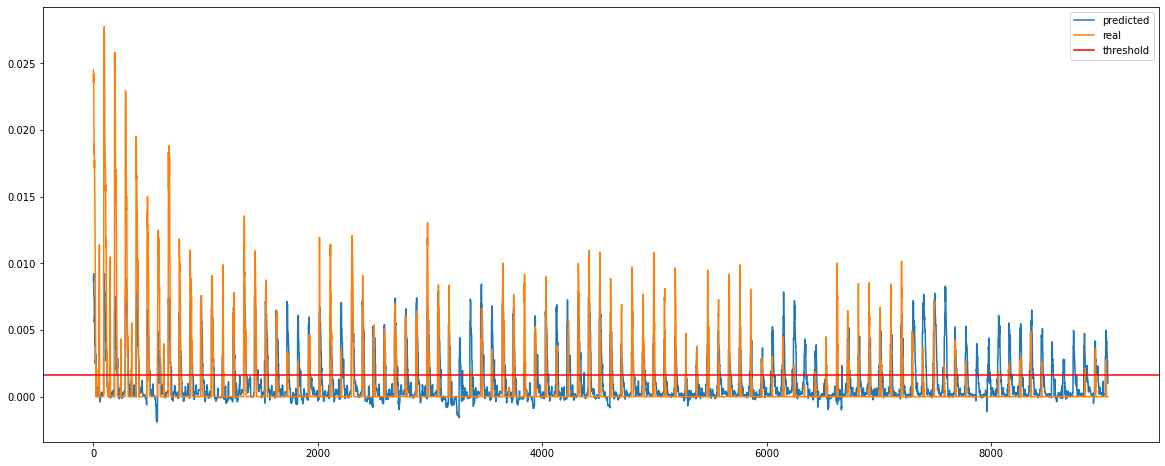

In [129]:
# figure size of the plot
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 8))
testing_data['min_u_regressor_sparse']['gb']['predicted']['bus_15'].plot()
testing_data['min_u_regressor_sparse']['gb']['real']['bus_15'].plot()
# plot a line with the threshold
plt.axhline(y=threshold, color='r', linestyle='-')
# Add legend
plt.legend(['predicted', 'real', 'threshold'])

In [132]:
data_max_u_sparse['X_test']

,T,R,wind_speed,wind_direction,season,weekday,last_hour_mean_wind_speed,last_day_mean_wind_direction,last_hour_mean_temperature,cos_hour_day,last_hour_mean_irradiance
0,0.938805,0.455304,0.160055,0.101979,1.0,0.142857,0.153689,0.096501,0.939932,0.258819,0.456003
1,0.938404,0.455304,0.165477,0.103931,1.0,0.142857,0.159173,0.098412,0.939531,0.258819,0.456003
2,0.938003,0.455304,0.170898,0.105884,1.0,0.142857,0.164657,0.100345,0.939129,0.258819,0.456003
3,0.937602,0.455304,0.176319,0.107836,1.0,0.142857,0.170142,0.102300,0.938728,0.258819,0.456003
4,0.937201,0.455304,0.181740,0.109788,1.0,0.142857,0.175626,0.104277,0.938327,0.500000,0.456003
...,...,...,...,...,...,...,...,...,...,...,...
9039,0.965973,0.377550,0.259132,0.225232,0.0,0.571429,0.273230,0.181410,0.966734,0.866025,0.411494
9040,0.965825,0.355341,0.251827,0.238410,0.0,0.571429,0.265839,0.194757,0.966587,0.965926,0.389251
9041,0.965678,0.333132,0.244521,0.251588,0.0,0.571429,0.258448,0.208104,0.966439,0.965926,0.367008
9042,0.965531,0.310923,0.237215,0.264766,0.0,0.571429,0.251058,0.221451,0.966292,0.965926,0.344765
